## Regresión Lineal Simple

El objetivo de una regresión lineal simple (**univariada**) es modelar una relación entre una característica simple (variable explicativa x) y una respuesta de valor continuo (variable de destino y).

La ecuación de un modelo lineal con una variable explicativa se define del siguiente modo: 

$$ y = w_0 + w_1x $$

Donde el peso $w_0$ representa el eje $y$ interceptado y $w_1$ es el coeficiente ponderado de la variable explicativa.

**El objetivo es aprender los pesos de la ecuación lineal anterior para describir la relación entre la variable explicativa y la variable de destino.**

**En otras palabras la regresión lineal se puede definir como la búsqueda de la recta que mejor se ajuste a través de puntos de muestra.**

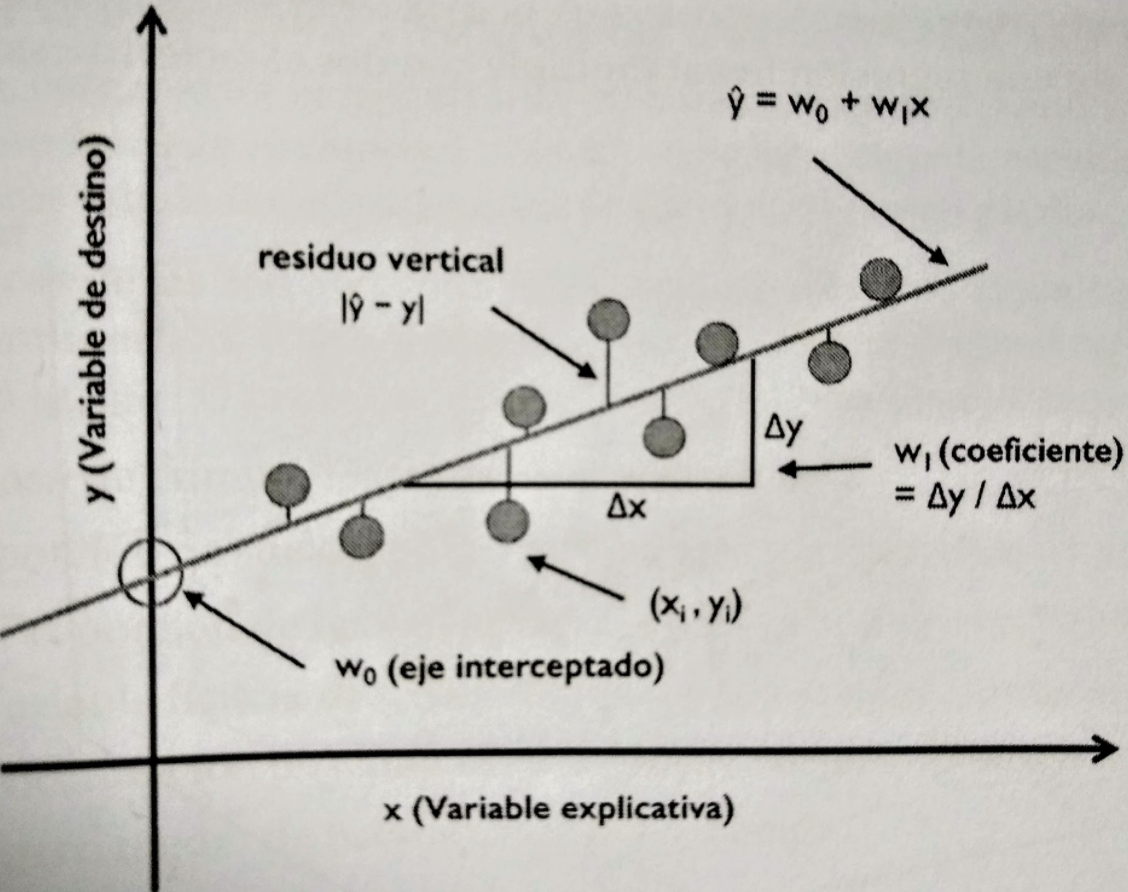

La línea que se ajusta a los puntos se conoce como **recta de regresión** y las líneas verticales que van de la recta de regresión a los puntos de muestra se conocen como **offsets o residuos**

### ¿Cómo se ajusta la recta?

Para encontrar los valores óptimos de $w_1$ y $w_0$ en una regresión lineal simple podemos utilizar el método de **Mínimos Cuadrados**. Este método busca minimizar la suma de los cuadrados de las diferencias entre las predicciones del modelo y los valores reales en el conjunto de datos.

Para un dataset de $n$ filas denotamos $x_i$ como variable de entrada y $y_i$ como variable de salida.

- Primero calculamos las medias de $x$ e $y$:

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n}x_i
$$

$$
\bar{y} = \frac{1}{n}\sum_{i=1}^{n}y_i
$$

- Calculamos las sumas de los productos cruzados y los cuadrados de $x$:

$$
S_{xy}=\sum_{i=1}^{n}(x_i - \overline{x})(y_i - \overline{y})
$$

$$
S_{xx}=\sum_{i=1}^{n}(x_i - \overline{x})^2
$$


Para encontrar el valor de $w_1$ utilizamos la siguiente ecuación:

$$
w_1  = \frac{S_{xy}}{S_{xx}}  = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} = \frac{cov(x, y)}{var(x)}
$$

Para encontrar el valor de $w_0$ se utiliza la siguiente ecuación:
    
$$
w_0 = \bar{y} - w_1 \bar{x}
$$

Estos valores de $w_1$ y $w_0$ son los coeficientes que definen la ecuación de la recta $y = w_0 + w_1x$ que mejor se ajusta a los datos.

### Evaluar el resultado 


**Existen diferentes métodos para evaluar el error entre la predicción y el valor real.** 

**1. Mean Absolute Error (MAE)**: Es el valor absoluto de los errores, es la métrica más fácil de entender y la podemos interpretar como el promedio del error. 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right | $$

**2. Mean Squared Error (MSE)**: Es el promedio del error cuadrado y se utiliza cuando se tienen grandes errores. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños. Ésta métrica puede ser sensible a valores atípicos (outliers) o errores significativos.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 $$

**3. Root Mean Squared Error (RMSE)**: Es el más popular de las métricas de evaluacion para regresiones porque se puede interpretar en las mismas unidades que $y$ lo que facilita entender la información que proporciona. 

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2} $$

**4. Relative Absolute Error/Residual Sum of Square (RAE/RSS)**: Utilizada para medir el error promedio en términos porcentuales entre las predicciones de un modelo y los valores reales en un conjunto de datos. Medir el error relativo permite evaluar la precisión del modelo en una escala relativa.

Se interpreta como el porcentaje de variabilidad en los valores reales que no es capturada por el modelo.

$$ RAE = \frac{\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right |}{\sum_{i=1}^{n} \left | y_i - \overline{y_i} \right |}$$

**5. Relative Squared Error.** Es muy similiar al RAE pero es una de las más usadas en la comunidad de data science debido a que se utiliza para calcular $R^2$ 

$$ RSE = \frac{\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 }{\sum_{i=1}^{n}  (y_i - \overline{y_i})^2 }  = \frac{SS_{res}}{SS_{tot}}$$

Donde:
- $\widehat{y_i}$ es la predicción de $y_i$

**6. R squared.** No es un error por si mismo, pero es la métrica más popular en el mundo de data science para evaluar el rendimiento de un modelo de regresión. Representa que tan cerca están las predicciones de los valores reales en una escala de -inf a 1. 

Entre más alto el valor de $R^2$ , mejor rendimiento tiene el modelo. El valor máximo que puede alcanzar es 1.

$$ R^2 = 1- RSE $$ 

**7. Adjusted R Squared.** Se utiliza para evitar que al agregar más variables explicativas al modelo (por ejemplo la regresión multilineal), el valor de $R^2$ no aumente por el hecho de existir más variables. Por lo que para regresiones lineales se recomienda utilizar cualquiera de las dos $R^2$ y para regresiones multilineales utilizar la $R^2$ ajustada.

$$
R^2 ajustada = 1 - \frac{(1-R^2)(N-1)}{N-p-1}
$$

Donde:
- $R^2$ = $R^2$ sin ajustar 
- p = Número de predictores (# variables explicativas )
- N = Total de patrones (# tamaño total de la muestra )

**HOLAAAA?*** $$ RSE = \sqrt{\frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - p - 1}} $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("../Data/FuelConsumptionCo2.csv")

df.head(3)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


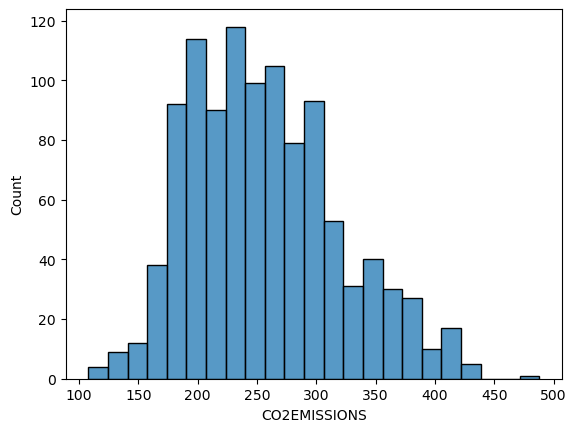

In [4]:
sns.histplot(df["CO2EMISSIONS"])
plt.show()

**En este dataset queremos predecir la varible "CO2EMISSIONS".**

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


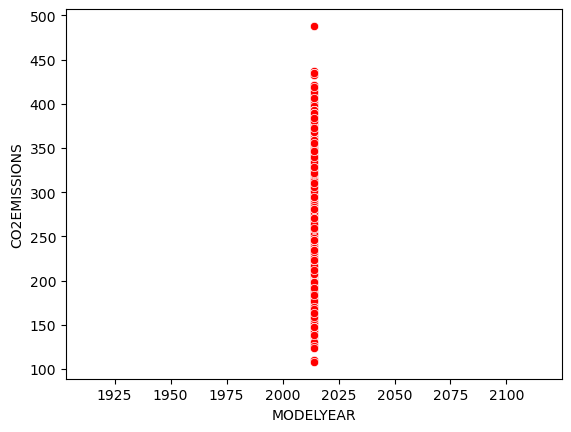

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


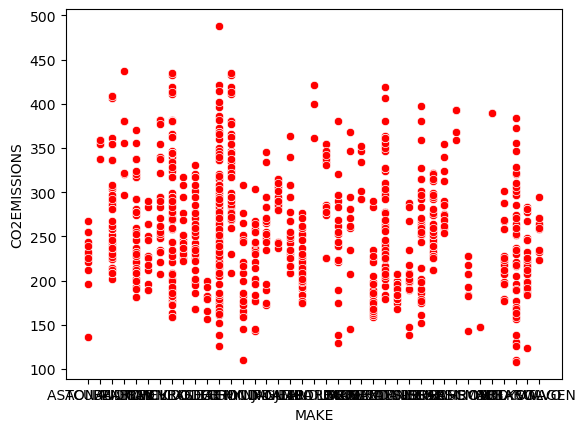

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


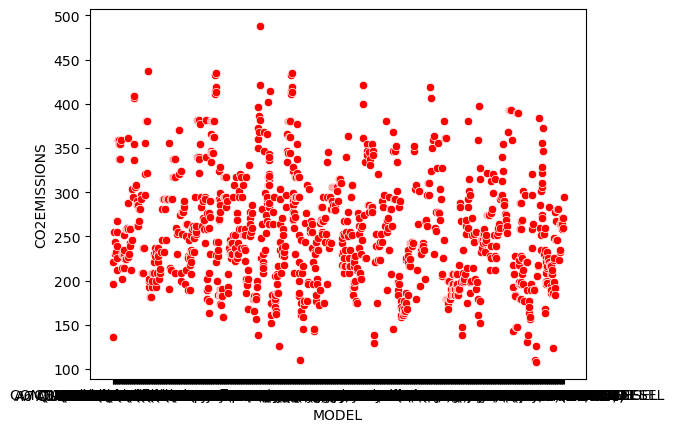

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


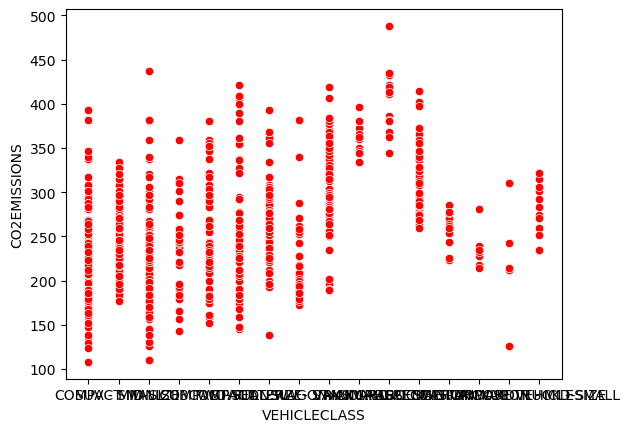

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


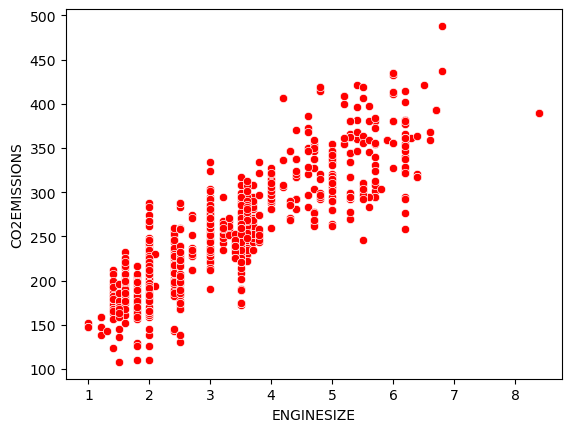

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


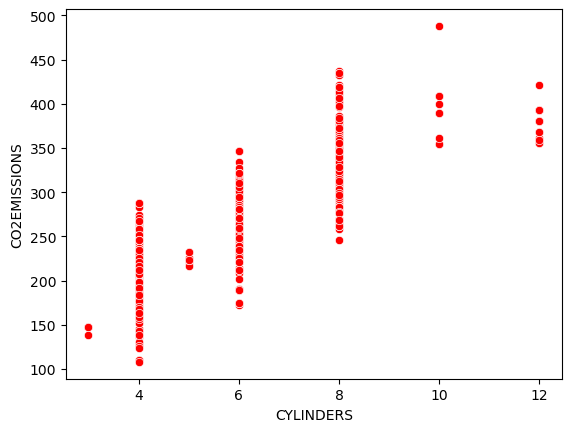

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


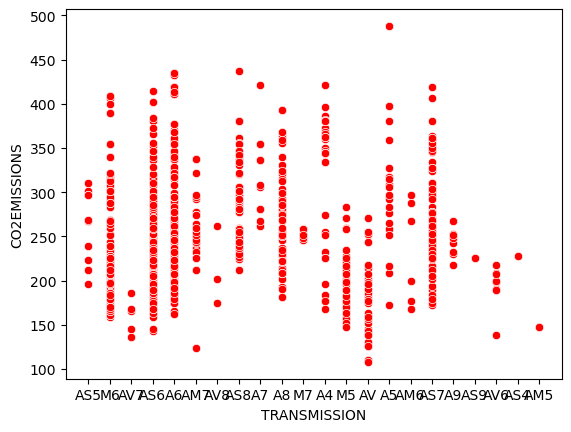

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


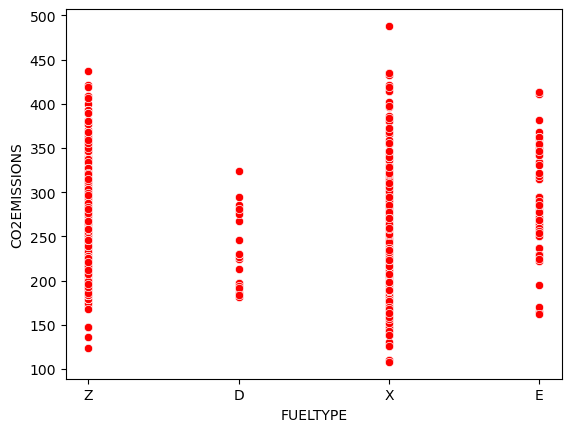

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


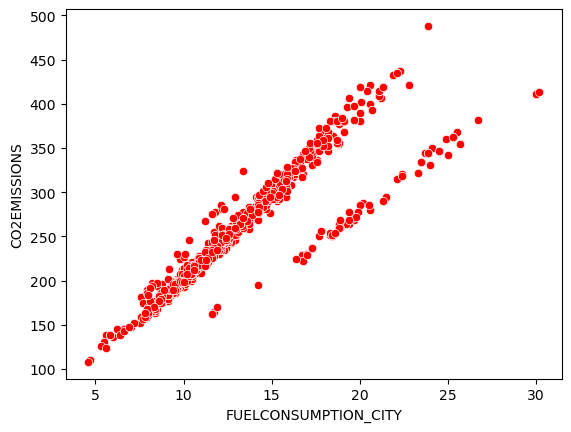

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


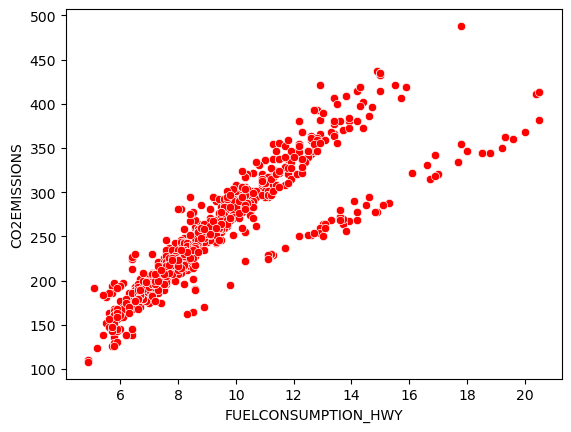

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


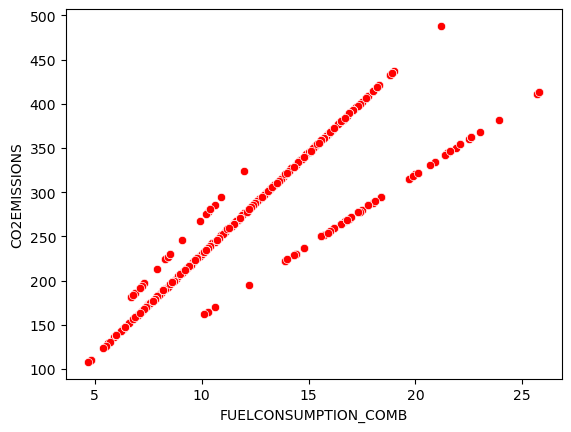

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


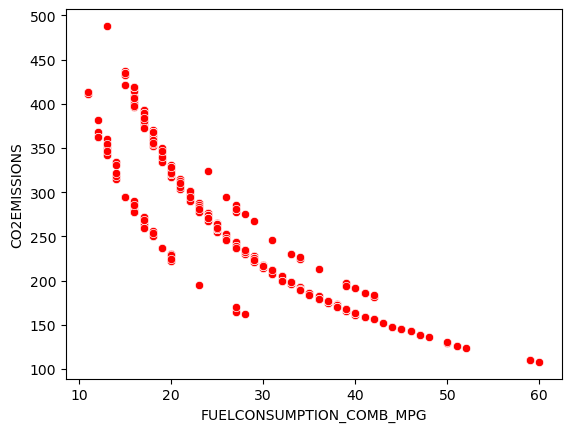

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


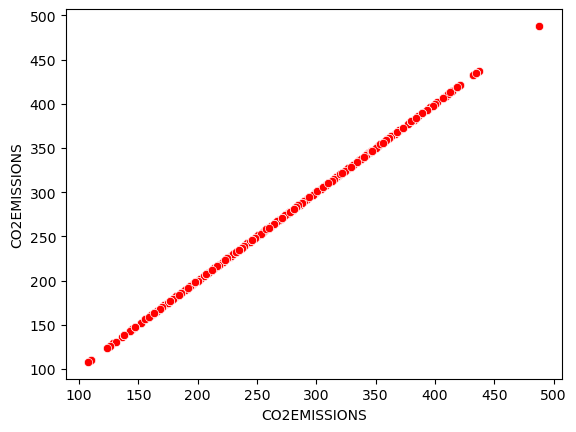

In [5]:
# Veamos como se relacionan todas las columnas con "CO2EMISSIONS".

for col in df.columns:
    sns.scatterplot(x = df[col], y = df["CO2EMISSIONS"], color = "r")
    plt.show()

In [6]:
# Vamos a tomar la primera columna de valores continuos "FUELCONSUMPTION_CITY".

df[["FUELCONSUMPTION_CITY", "CO2EMISSIONS"]]

,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,9.9,196
1,11.2,221
2,6.0,136
3,12.7,255
4,12.1,244
...,...,...
1062,13.4,271
1063,13.2,264
1064,13.4,271
1065,12.9,260


In [ ]:
# Ahora vamos a utilizar "ENGINESIZE" para ver si podemos predecir "CO2EMISSIONS"

In [7]:
# X es la variable explicativa 
# y es la variable destino o variable objetivo

X = df[["FUELCONSUMPTION_CITY"]].values # El modelo nos pide que utilicemos una matriz para entrenar.
y = df["CO2EMISSIONS"].values

X.shape, y.shape

((1067, 1), (1067,))

In [8]:
X

array([[ 9.9],
       [11.2],
       [ 6. ],
       ...,
       [13.4],
       [12.9],
       [14.9]])

### Normalización

In [9]:
# Vamos a Normalizar o Estandarizar los datos.

# Vamos a utilizar un escalador para "X" y uno para "y".

from sklearn.preprocessing import MinMaxScaler

# Normalizacion de X
scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)


# Normalizacion de y
scaler_y = MinMaxScaler()
scaler_y.fit(y.reshape(-1, 1)) # .reshape(-1, 1) se utiliza para transformar un vector a una matriz
y = scaler_y.transform(y.reshape(-1, 1))

In [10]:
for x, y1 in zip(X, y):
    print(x, y1)

[0.20703125] [0.23157895]
[0.2578125] [0.29736842]
[0.0546875] [0.07368421]
[0.31640625] [0.38684211]
[0.29296875] [0.35789474]
[0.28515625] [0.32105263]
[0.28125] [0.32631579]
[0.3203125] [0.38684211]
[0.34375] [0.41842105]
[0.234375] [0.27368421]
[0.2578125] [0.30789474]
[0.29296875] [0.34473684]
[0.5234375] [0.66052632]
[0.5234375] [0.66052632]
[0.5] [0.60526316]
[0.52734375] [0.64736842]
[0.5] [0.60526316]
[0.52734375] [0.64736842]
[0.5234375] [0.66052632]
[0.20703125] [0.24736842]
[0.26953125] [0.32105263]
[0.2421875] [0.27894737]
[0.26953125] [0.32105263]
[0.26953125] [0.32105263]
[0.2421875] [0.27894737]
[0.2890625] [0.33421053]
[0.3203125] [0.37631579]
[0.203125] [0.30526316]
[0.33203125] [0.39473684]
[0.203125] [0.30526316]
[0.33203125] [0.39473684]
[0.34765625] [0.4]
[0.2109375] [0.31315789]
[0.33203125] [0.39473684]
[0.39453125] [0.47368421]
[0.53125] [0.66578947]
[0.21484375] [0.32105263]
[0.28125] [0.35263158]
[0.2890625] [0.34473684]
[0.32421875] [0.39473684]
[0.20703125]

### Train, Test

Una operación que es común en todos los modelos de aprendizaje supervisado es la división de nuestro conjunto de datos en -al menos- dos partes: una parte **Train**, de entrenamiento, que corresponderá a la mayor parte de nuestro dataset y que usaremos para entrenar nuestro modelo y un parte **Test**, de menor tamaño, sobre la que evaluaremos nuestro modelo entrenado.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

print(f"Conjunto de Train: {X_train.shape, y_train.shape}")
print(f"Conjunto de Test: {X_test.shape, y_test.shape}")

Conjunto de Train: ((853, 1), (853, 1))
Conjunto de Test: ((214, 1), (214, 1))


In [12]:
X_train

array([[0.15234375],
       [0.40625   ],
       [0.2578125 ],
       [0.3359375 ],
       [0.53515625],
       [0.49609375],
       [0.3203125 ],
       [0.2890625 ],
       [0.47265625],
       [0.390625  ],
       [0.5078125 ],
       [0.22265625],
       [0.7109375 ],
       [0.4609375 ],
       [0.5625    ],
       [0.35546875],
       [0.53515625],
       [0.35546875],
       [0.36328125],
       [0.265625  ],
       [0.4765625 ],
       [0.0625    ],
       [0.27734375],
       [0.2421875 ],
       [0.17578125],
       [0.5546875 ],
       [0.37890625],
       [0.59375   ],
       [0.37890625],
       [0.234375  ],
       [0.12890625],
       [0.38671875],
       [0.25390625],
       [0.375     ],
       [0.37890625],
       [0.17578125],
       [0.2265625 ],
       [0.12109375],
       [0.53515625],
       [0.3515625 ],
       [0.1796875 ],
       [0.56640625],
       [0.3125    ],
       [0.40625   ],
       [0.3203125 ],
       [0.82421875],
       [0.296875  ],
       [0.160

In [13]:
y_train

array([[0.18684211],
       [0.48421053],
       [0.41842105],
       [0.40526316],
       [0.71578947],
       [0.60526316],
       [0.38157895],
       [0.33421053],
       [0.56315789],
       [0.47894737],
       [0.6       ],
       [0.28421053],
       [0.82368421],
       [0.6       ],
       [0.72631579],
       [0.45526316],
       [0.67894737],
       [0.42894737],
       [0.44210526],
       [0.33421053],
       [0.3       ],
       [0.09736842],
       [0.15      ],
       [0.30263158],
       [0.2       ],
       [0.39736842],
       [0.46052632],
       [0.43157895],
       [0.49736842],
       [0.28421053],
       [0.21315789],
       [0.46052632],
       [0.30789474],
       [0.45526316],
       [0.47368421],
       [0.2       ],
       [0.24210526],
       [0.17631579],
       [0.71578947],
       [0.42368421],
       [0.2       ],
       [0.68421053],
       [0.36842105],
       [0.48947368],
       [0.37631579],
       [0.64736842],
       [0.45526316],
       [0.194

### Regresión Lineal

In [14]:
# Algoritmo de regresión lineal de sklearn

regresion_lineal = LinearRegression()

regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("w_1:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

w_1: [[0.93317364]]
w_0: [0.07373318]


In [15]:
### Grafico de la Regresión

b = regresion_lineal.intercept_[0]
m = regresion_lineal.coef_[0][0]

# Ecuación de una recta: y = m*x + b

print(f"y = {m}x + {b}")

y = 0.9331736438088107x + 0.07373318377347604


c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


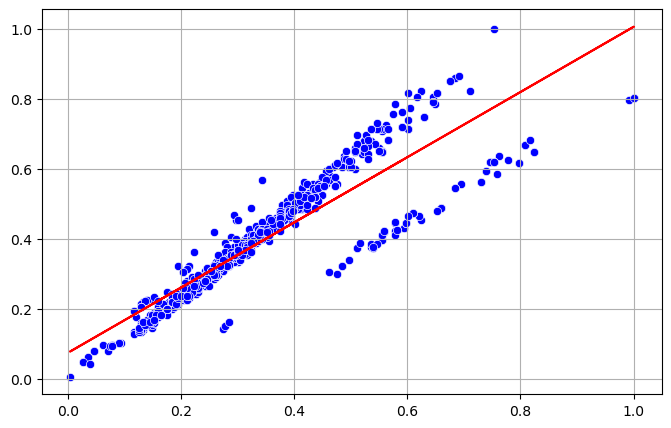

In [16]:
# Escala normalizada

plt.figure(figsize = (8, 5))

# Puntos de entrenamiento (X_train, y_train)
sns.scatterplot(x = X_train.flatten(), y = y_train.flatten(), color = "blue")


# Plot de la Regresión
ecuacion_recta = m*X_train.flatten() + b # Ecuación de la recta y = m*x + b

plt.plot(X_train.flatten(), ecuacion_recta, "red")


plt.grid()
plt.show()

# Estos resultados estan en escala de 0 a 1 porque han sido normalizados.
# Si quisieramos representarlos en la escala natural debemos revertir la normalización.

**Vamos a revertir la transformación de X_train y y_train para representarlos en su escala original.**

In [17]:
X_train_natural = scaler_x.inverse_transform(X_train)

y_train_natural = scaler_y.inverse_transform(y_train)

c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


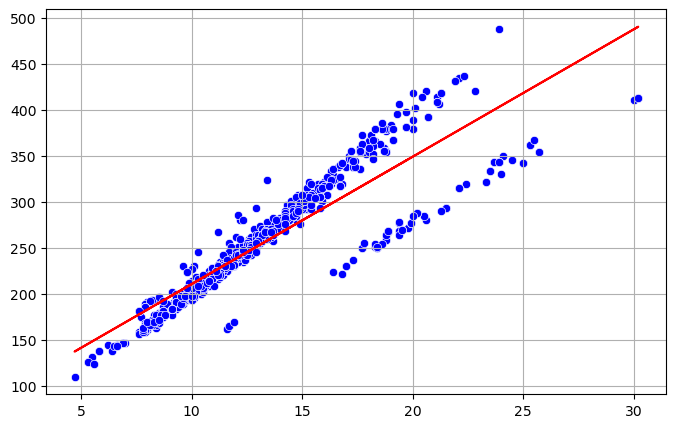

In [18]:
# Escala original

plt.figure(figsize = (8, 5))

# Puntos de entrenamiento (X_train, y_train escala original) 
sns.scatterplot(x = X_train_natural.flatten(), y = y_train_natural.flatten(), color = "blue")


# Plot de la Regresión
ecuacion_recta = m*X_train.flatten() + b # Ecuación de la recta

# Usamos y_scaler para transformar los resultados a la escala original
resultados_escalados = scaler_y.inverse_transform(ecuacion_recta.reshape(-1, 1)) 

plt.plot(X_train_natural.flatten(), resultados_escalados, "red")


plt.grid()
plt.show()

### Predicciones

Para utilizar nuestro modelo para predecir podemos usar el método **`.predict()`**.

Éste método toma como parametro una o varias filas para hacer predicciones. Nos retorna una lista con las predicciones.

La lista de estos resultados lo vamos a guardar en una variable llamada **`yhat`**.

In [19]:
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:20], y_test[:20]):
    print(f"Predicción: {i[0]:20} \tValor real: {j[0]}")

Predicción:  0.46741581475531807 	Valor real: 0.5157894736842105
Predicción:   0.3179622233640632 	Valor real: 0.2973684210526316
Predicción:   0.4564801861169336 	Valor real: 0.4894736842105263
Predicción:   0.3216074329101914 	Valor real: 0.2973684210526316
Predicción:   0.2888005469950379 	Valor real: 0.2605263157894737
Predicción:   0.3617047379176012 	Valor real: 0.3631578947368421
Predicción:    0.594998148869804 	Valor real: 0.3973684210526316
Predicción:  0.44554455747854904 	Valor real: 0.531578947368421
Predicción:   0.4747062338475744 	Valor real: 0.531578947368421
Predicción:   0.6059337775081884 	Valor real: 0.41052631578947363
Predicción:   0.5257391674933687 	Valor real: 0.32105263157894737
Predicción:   0.6606119207001109 	Valor real: 0.75
Predicción:  0.37993078564824206 	Valor real: 0.39473684210526316
Predicción:   0.3617047379176012 	Valor real: 0.3631578947368421
Predicción:  0.39451162383275473 	Valor real: 0.4236842105263158
Predicción:   0.3689951570098576 	Valo

### Métricas

In [20]:
# Sklearn tiene las formulas de algunas métricas en funciones.

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [21]:
yhat_natural = scaler_y.inverse_transform(yhat)
ytest_natural = scaler_y.inverse_transform(y_test)

In [22]:
print(f"MAE: {mean_absolute_error(ytest_natural, yhat_natural)}")

print(f"MSE: {mean_squared_error(ytest_natural, yhat_natural)}")

print(f"R**2: {r2_score(ytest_natural, yhat_natural)}")

MAE: 19.437233522675406
MSE: 750.8103646320072
R**2: 0.8184231533160797


In [23]:
# Relative Absolute Error

RAE = np.sum(np.abs(np.subtract(ytest_natural, yhat_natural))) / np.sum(np.abs(np.subtract(ytest_natural, np.mean(ytest_natural))))

print(f"RAE: {RAE}")

RAE: 0.3715946475881422


In [24]:
# Relative Square Error

RSE = np.sum(np.square(np.subtract(ytest_natural, yhat_natural))) / np.sum(np.square(np.subtract(ytest_natural, np.mean(ytest_natural))))

print(f"RSE: {RSE}")

RSE: 0.1815768466839203


In [25]:
# Adjusted R**2

r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

print(f"Adjusted R**2: {r2_ajustada}")

Adjusted R**2: 0.8175666587562499


In [26]:
import math

In [27]:
print(f"MAE:\t {mean_absolute_error(ytest_natural, yhat_natural)}")
print(f"RMSE:\t {math.sqrt(mean_squared_error(ytest_natural, yhat_natural))}")
print(f"R**2:\t {r2_score(y_test, yhat)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 19.437233522675406
RMSE:	 27.40091904721459
R**2:	 0.8184231533160797
RAE:	 0.3715946475881422
RSE:	 0.1815768466839203
Adjusted R**2:	 0.8175666587562499


### y_test vs yhat

In [28]:
# Veamos los valores de yhat, y_test y su diferencia

df_pred = pd.DataFrame()

df_pred["y_test"] = scaler_y.inverse_transform(y_test).flatten()
df_pred["yhat"] = scaler_y.inverse_transform(yhat).flatten()

df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)

df_pred = df_pred.sort_values("diferencia")

df_pred.head(20)

,y_test,yhat,diferencia
159,251.0,250.988519,0.0046
16,232.0,231.596004,0.1741
206,209.0,209.433130,0.2072
5,246.0,245.447800,0.2245
13,246.0,245.447800,0.2245
36,260.0,259.299597,0.2694
199,214.0,214.973849,0.4551
108,225.0,226.055286,0.4690
127,184.0,183.114717,0.4811
65,237.0,235.751543,0.5268


In [29]:
df_pred.tail(20)

,y_test,yhat,diferencia
183,360.0,417.210074,15.8917
105,152.0,176.188819,15.9137
37,362.0,422.750793,16.7820
56,344.0,403.358278,17.2553
205,411.0,487.854235,18.6993
30,346.0,411.669356,18.9796
200,318.0,382.580584,20.3084
148,285.0,349.336272,22.5741
147,110.0,137.403789,24.9125
201,108.0,136.018610,25.9432


c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\ProgramData\anaconda3\envs\hack_a_boss\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


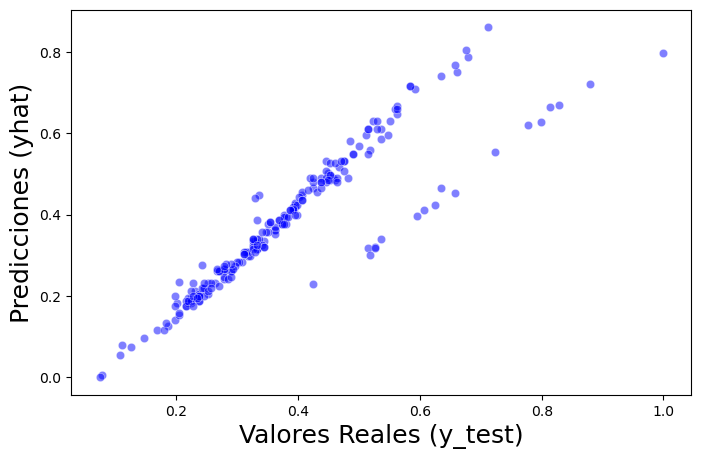

In [30]:
# Vamos a comparar que tan alejados estan los valores reales (y_test) y los valores predichos (yhat)

plt.figure(figsize = (8, 5))

sns.scatterplot(x = yhat.flatten(), y = y_test.flatten(), alpha = 0.5, color = "blue")

plt.xlabel("Valores Reales (y_test)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)

plt.show()

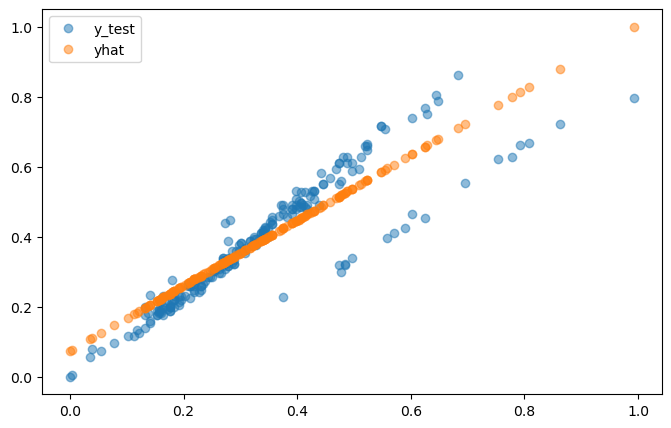

In [31]:
# Si graficamos X_test vs y_test obtenemos la nube de puntos de valores reales

# Si graficamos X_test vs yhat obtenemos la "nube" de puntos de valores predichos

plt.figure(figsize = (8, 5))

plt.plot(X_test, y_test, marker = "o", linestyle = "", label = "y_test", alpha = 0.5) # Valores reales

plt.plot(X_test, yhat, marker = "o", linestyle = "", label = "yhat", alpha = 0.5) # Valores Predichos

plt.legend()
plt.show()

In [ ]:
# Repetir el notebook usando otra columna.

In [ ]:
################################################################################################################################